In [1]:
# import statements
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
from scipy import stats
import seaborn as sns
from mpl_toolkits import mplot3d
import importlib
importlib.import_module('mpl_toolkits.mplot3d').__path__
import matplotlib.pyplot as plt
import time

In [2]:
df_train=pd.read_csv('Fertilizer database.csv')

df_tr=df_train

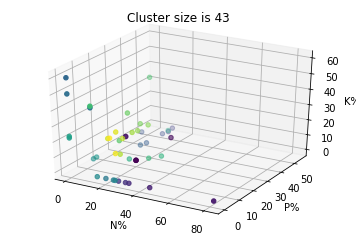

In [3]:
clmns=['n%','p%','k%']
tr_clmns=['n%','p%','k%']


# In[6]:


# for i in range(2,700,20):
i=600
# kmeans = KMeans(n_clusters=i, random_state=0).fit(df_tr[tr_clmns])
# labels = kmeans.labels_
meanShift=MeanShift(bandwidth=0.1).fit(df_tr[tr_clmns])
labels = meanShift.labels_
df_tr['clusters'] = labels
clmns.extend(['clusters'])
df_clust=df_tr[clmns]
df_test=df_tr[tr_clmns]
clusterCenters=meanShift.cluster_centers_
n_cluster=len(np.unique(labels))
#listOutput.append(kmeans.score(df_test.values))
fig=plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df_tr[tr_clmns[0]],df_tr[tr_clmns[1]],df_tr[tr_clmns[2]],c=labels,marker='o');
ax.set_title("Cluster size is "+str(n_cluster))
ax.set_xlabel('N%')
ax.set_ylabel('P%')
ax.set_zlabel('K%')
plt.show()
# values=np.array([['122','6.048','348']])#,['0.4','0.5','0.6','0.6']])
# #     print(values)
# prediction=kmeans.predict(values)
# #     print(prediction)
# out=df_tr[['Crop','Variety']].loc[df_tr['clusters'] ==  prediction[0]]
# print(out)


# In[21]:


In [4]:
arr=[0,120,120]
b=arr[0]+arr[1]+arr[2]
farr=[0,0,0]
for i in range(0,3):
    farr[i]=(arr[i]*100)/b
print(farr)

[0.0, 50.0, 50.0]


In [5]:
val=np.asarray(farr)
values=[val]
prediction=meanShift.predict(values)
print("Predicted Cluster "+str(prediction))

Predicted Cluster [30]


In [6]:
output=df_tr[['Fert_name','n%','p%','k%','n_ratio','p_ratio','k_ratio','price/kg','price(100kg)bag']].loc[df_tr['clusters'] ==  prediction[0]]
# print(output)
df_test=df_tr[tr_clmns]
output

,Fert_name,n%,p%,k%,n_ratio,p_ratio,k_ratio,price/kg,price(100kg)bag
33,Mono Potassium Phosphate,0.0,52,34,0,26,17,90.0,9000.0


In [7]:
a=[0,0,0]
cp_a=[0,0,0]
b=[0,0,0]
for row in output.itertuples():
    for i in range(0,3):
        if(row[i+2]!=0):
            a[i]=arr[i]/row[i+2]
    a.sort()
    if(a[0]==0):
        for i in range(1,3):
            a[i]=a[1]
            cp_a[i]=a[i]*row[9]
    else:
        for i in range(0,3):
            a[i]=a[0]
            cp_a[i]=a[i]*row[9]
    for i in range(0,3):
        b[i]=a[i]*row[i+2]
            

In [8]:
print(a)
print(cp_a)
print(b) #the total kg of fertilizer the predicted cluster can provide of n-p-k proportion

[0, 2.3076923076923075, 2.3076923076923075]
[0, 20769.230769230766, 20769.230769230766]
[0.0, 119.99999999999999, 78.46153846153845]


In [9]:
# triple superphosphate 0-46-0 837.2
# potassium chloride 0-0-60 1570
# urea 46-0-0 536
c=[0,0,0]
cp_c=[0,0,0]

c[0]=arr[0]-b[0]
c[0]=c[0]/46
cp_c[0]=c[0]*536

c[1]=arr[1]-b[1]
c[1]=c[1]/46
cp_c[1]=c[1]*837.2

c[2]=arr[2]-b[2]
c[2]=c[2]/60
cp_c[2]=c[2]*1570

In [10]:
print(c) # amount of fertilizer required
print(cp_c) # rate of fertilizer
# additional fertilizers urea --- triple superphosphate --- potassium chloride

[0.0, 3.089316242435218e-16, 0.6923076923076924]
[0.0, 2.5863755581667646e-13, 1086.9230769230771]


In [11]:
tot_cp=[0,0,0]
tot=0
cp_a.sort()
cp=cp_a[2]
for i in range(0,3):
    tot_cp[i]=cp_c[i]
    tot=tot+tot_cp[i]
tot=tot+cp

In [12]:
print(tot_cp) # total cost price of fertlizer
print(tot)#total

[0.0, 2.5863755581667646e-13, 1086.9230769230771]
21856.153846153844
